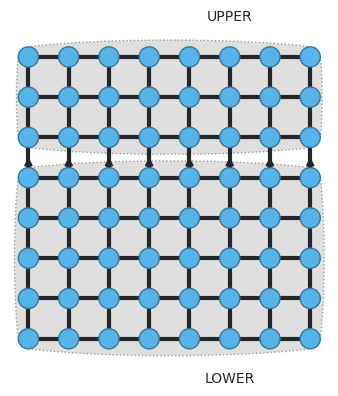

In [36]:
# %config InlineBackend.figure_formats = ['svg']
from quimb import schematic

presets = {
    'bond': {'linewidth': 3},
    'phys': {'linewidth': 1.5},
    # 'center': {
    #     # `get_wong_color` uses more colorblind friendly colors
    #     'color': schematic.get_wong_color('orange'),
    #     'hatch': '/////',
    # },
    # 'left': {
    #     'color': schematic.get_wong_color('bluedark'),
    # },
    'site': {
        'color': schematic.get_wong_color('blue'),
    },
}

d = schematic.Drawing(presets=presets)


center = 5
Lx = 8
Ly = 8
for i in range(Lx):
    for j in range(Ly):
    
        # draw tensor
        d.circle((i, j), preset=(
            # "center" if i == center else
            # "left" if i < center else
            # "right"
            "site"
        ))

        # draw vertical index
        if j + 1 < Ly:
            d.line((i, j), (i, j+1), preset='bond')

        # draw horizontal bond
        if i + 1 < Lx:
            d.line((i, j), (i + 1, j), preset='bond')

        # # draw isometric conditions
        # if i != center:
        #     d.arrowhead((i, -2/3), (i, 0), preset='phys')
        # if i < center - 1:
        #     d.arrowhead((i, 0), (i + 1, 0), preset='bond')
        # if i > center + 1:
        #     d.arrowhead((i, 0), (i - 1, 0), preset='bond')

# label the upper half
d.text((center, Ly), 'UPPER')
d.patch_around([(i, j) for i in range(Lx) for j in range(Ly-1, Ly-4, -1)], radius=0.25)
for i in range(Lx):
    d.arrowhead((i, Ly-4), (i, Ly-4 + 4/5), preset='bond')

# label the lower half
d.text((center, -1), 'LOWER')
# d.patch_around([(i, 0) for i in range(center, L)], radius=0.5)
d.patch_around([(i, j) for i in range(Lx) for j in range(5)], radius=0.25)


# # label pair
# if center + 1 < L:
#     d.patch_around_circles(
#         (center, 0), 0.3,
#         (center + 1, 0), 0.3,
#         facecolor=(.2, .8, .5, .4),
#     )

# # label the right
# if center + 2 < L:
#     d.text((center + 2, 0.8), 'RIGHT')
#     d.patch_around([(i, 0) for i in range(center + 2, L)], radius=0.5)